**Question 1.Implement logistic regression on the Iris dataset.**


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

model = OneVsRestClassifier(LogisticRegression(max_iter=200))
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)




Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



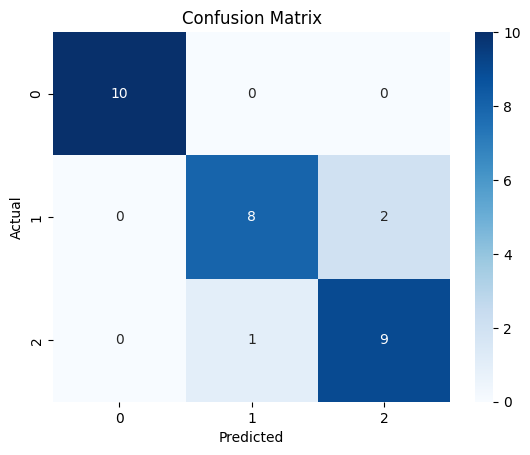

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import pandas as pd

feature_names = iris.feature_names

for i, clf in enumerate(model.estimators_):
    coefs = clf.coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    print(f"\nClass {i} coefficients:")
    print(feature_importance)





Class 0 coefficients:
             Feature  Coefficient
0  sepal length (cm)    -1.076849
1   sepal width (cm)     1.120774
2  petal length (cm)    -1.692032
3   petal width (cm)    -1.555256

Class 1 coefficients:
             Feature  Coefficient
0  sepal length (cm)     0.062986
1   sepal width (cm)    -1.266145
2  petal length (cm)     0.857461
3   petal width (cm)    -0.906712

Class 2 coefficients:
             Feature  Coefficient
0  sepal length (cm)     0.236488
1   sepal width (cm)    -0.393858
2  petal length (cm)     2.152074
3   petal width (cm)     2.945038


In [13]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_std = sc.transform(new_sample)
prediction = model.predict(new_sample_std)
print(f"Predicted class: {iris.target_names[prediction][0]}")


Predicted class: setosa
